* ##### Milestone5: 12.2 Course Project
* ##### Name: Barath Anandaraman
* ##### Course: DSC630-T301
* ##### Week12: Final Project
* ##### Date: 05/29/2025

---

##### Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option("display.max_columns", None)
import seaborn as sns
%matplotlib inline
import warnings
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')

#### Dataset taken from https://www.hackerearth.com/problem/machine-learning/predict-the-churn-risk-rate-11-fb7a760d/

In [2]:
# Load Churn dataset
churn_df = pd.read_csv("churn.csv", index_col=0)

##### Check overview of the dataset

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  avg_ti

#### Dataset has 23 columns and 36992 rows

####                                     Column explanations

| Column | Description |
|:---------|:--------|
|  age   |  Represents the age of a customer   |
| gender   |  Represents the gender of a customer   |
|  security_no   |  Represents a unique security number that is used to identify a person   | 
|  region_category   |  Represents the region that a customer belongs to    | 
|  membership_category   |  Represents the category of the membership that a customer is using   | 
|  joining_date   |  Represents the date when a customer became a member    | 
|  joined_through_referral   |  Represents whether a customer joined using any referral code or ID   | 
|  referral_id   |  Represents a referral ID   | 
|  preferred_offer_types   |  Represents the type of offer that a customer prefers   | 
|  medium_of_operation   |  Represents the medium of operation that a customer uses for transactions   | 
|  internet_option   |  Represents the type of internet service a customer uses   | 
|  last_visit_time   |  Represents the last time a customer visited the website   | 
|  days_since_last_login   |  	Represents the no. of days since a customer last logged into the website   | 
|  avg_time_spent   |  	Represents the average time spent by a customer on the website   | 
|  avg_transaction_value   |  Represents the average transaction value of a customer   | 
|  avg_frequency_login_days   |  Represents the no. of times a customer has logged in to the website   | 
|  points_in_wallet   |  Represents the points awarded to a customer on each transaction   | 
|  used_special_discount   |  Represents whether a customer uses special discounts offered   | 
|  offer_application_preference   |  Represents whether a customer prefers offers   | 
|  past_complaint   |  	Represents whether a customer has raised any complaints   | 
|  complaint_status   |  	Represents whether the complaints raised by a customer was resolved  | 
|  feedback   |  Represents the feedback provided by a customer  | 
|  churn_risk_score   |   0 or 1 [Customer will Stay or Exit]   | 


##### Function to check basic issues on the dataset

In [4]:
def checkIssues(df):
    """ Check for Issues on the dataframe """
    df_state = []
    columns = df.columns 
    for i in columns : 
        types = df[i].dtypes
        unique_value = df[i].nunique()         
        nan_value= df[i].isnull().sum() 
        value_count= df[i].isnull().count() 
        nan_percentage= round(nan_value/value_count*100,2)
        duplicated= df.duplicated().sum()   
        irreg_value = df.apply(lambda x: ((x =='?') | (x == ' ?') | (x =='NA') |
                                         (x =='na') | (x =='xxxxxx')).sum())
        df_state.append ([i , types , unique_value , nan_value, nan_percentage,duplicated,irreg_value ])
            
    df_state = pd.DataFrame(df_state)
    df_state.columns =['Name of column' , 'Types' ,'Unique_data' , 'NAN value', "NAN_percentage","Duplicated", "Irregular"]
    print(df_state)

In [5]:
# Check for issues visually on the dataset
checkIssues(churn_df)

                  Name of column    Types  Unique_data  NAN value  \
0                            age    int64           55          0   
1                         gender   object            3          0   
2                    security_no   object        36992          0   
3                region_category   object            3       5428   
4            membership_category   object            6          0   
5                   joining_date   object         1096          0   
6        joined_through_referral   object            3          0   
7                    referral_id   object        11359          0   
8          preferred_offer_types   object            3        288   
9            medium_of_operation   object            4          0   
10               internet_option   object            3          0   
11               last_visit_time   object        30101          0   
12         days_since_last_login    int64           27          0   
13                avg_time_spent  

In [6]:
# Check the first 5 rows of the data
print(churn_df.head(5))

   age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1   32      F     5K0N3X1            City   Premium Membership   2017-08-28   
2   44      F     1F2TCL3            Town        No Membership   2016-11-11   
3   37      M     VJGJ33N            City        No Membership   2016-10-29   
4   31      F     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                   ?           Wi-Fi     

#### Summary based on dataset analysis
##### 1. Dataset has no duplicates
##### 2. NA values are in columns region_category, preferred_offer_types, points_in_wallet
##### 3. Gender column has 3 unique values and needs to be checked
##### 4. avg_frequency_login_days should be numeric, but is currently object, needs to be checked
##### 5. security_no, referral_id can be removed
##### 6. churn_risk_score is the target variable

#### Correct data in avg_frequency_login_days

##### Convert avg_frequency_login_days to numeric format

In [7]:
churn_df['avg_frequency_login_days'] = pd.to_numeric(churn_df['avg_frequency_login_days'], errors='coerce')

In [8]:
churn_df['avg_frequency_login_days'] = churn_df['avg_frequency_login_days'].astype('float64')

##### Drop columns not needed for the modeling process

In [9]:
churn_df.drop(['security_no','referral_id'],axis=1,inplace=True)

In [10]:
# Check the new shape of dataset
churn_df.shape

(36992, 21)

##### Dataset now has 36,992 rows and 21 columns

In [11]:
# Check values of gender column
churn_df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

##### 59 rows have value 'Unknown' in gender

In [12]:
# separate numeric and categorical columns
numeric_cols = churn_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = churn_df.select_dtypes(include=['object','category', 'bool']).columns.tolist()

In [13]:
#Print Numeric columns
numeric_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'churn_risk_score']

In [14]:
# Print Categorical columns
categorical_cols

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

---

#### Check Numeric distributions using histograms

In [15]:
# Set seaborn style
sns.set(style="whitegrid")

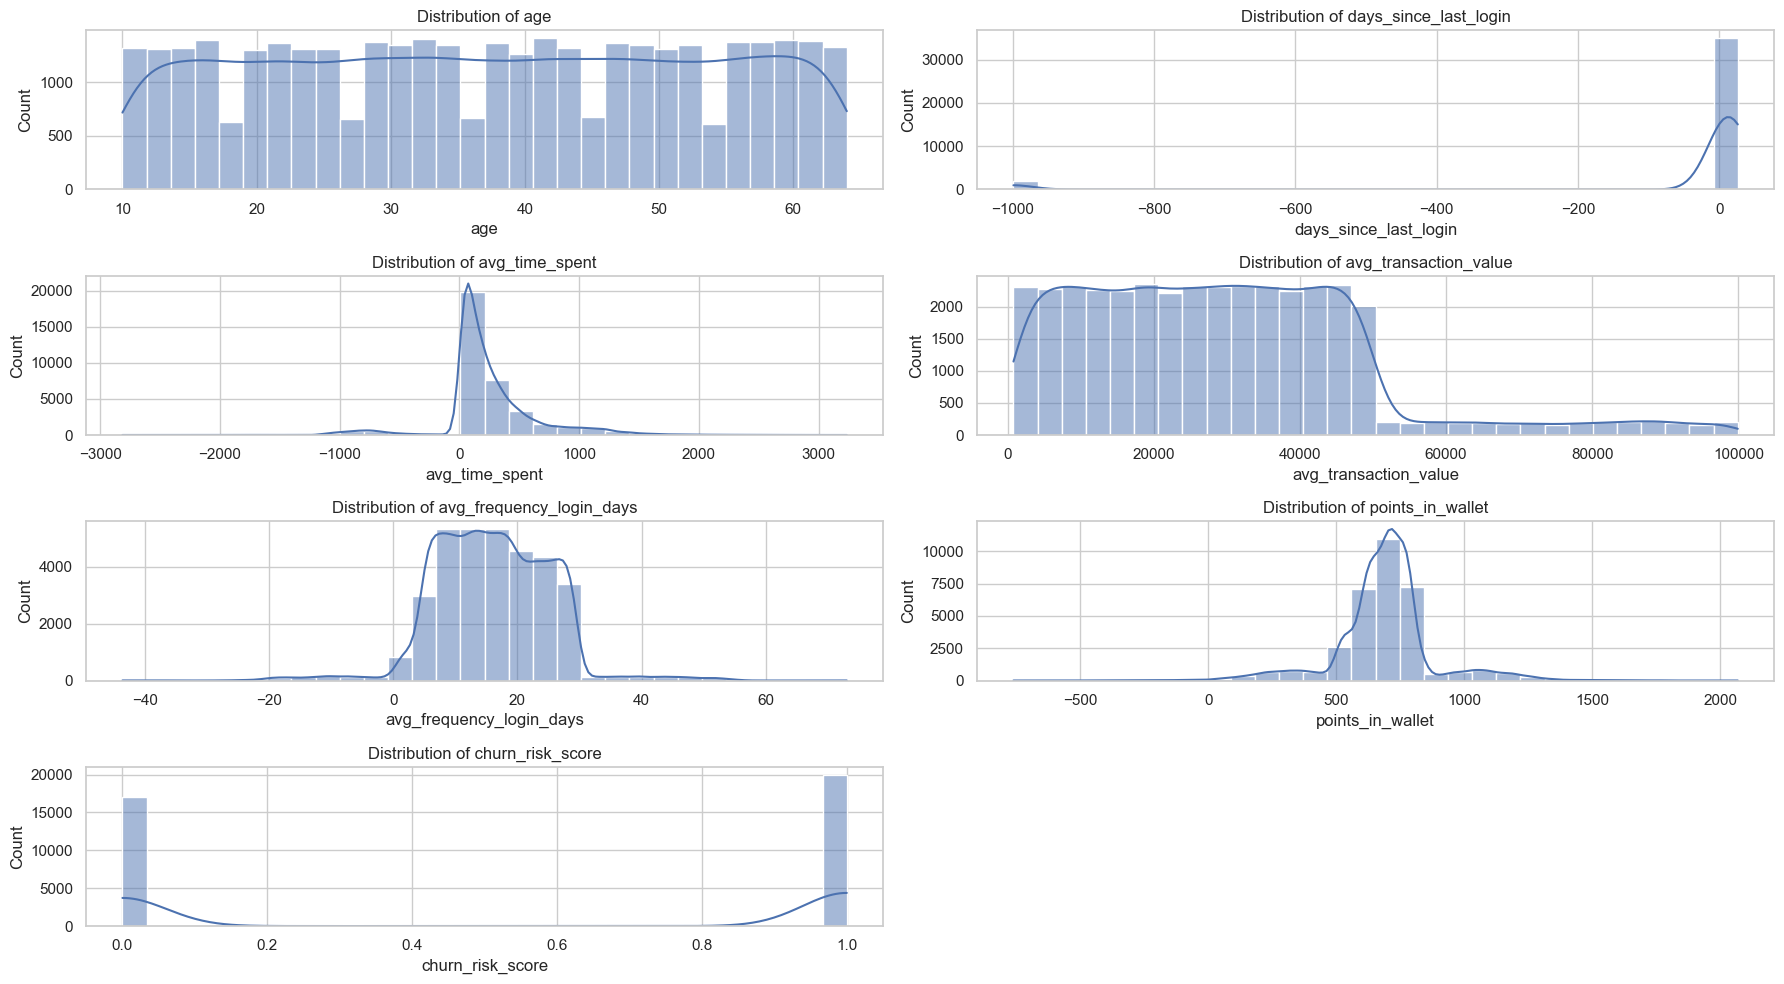

In [16]:
# Create numeric distributions
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,10))
axes = axes.flatten()

# Plot histograms
numeric_cols_clean = [col for col in numeric_cols if col !='Unnamed: 0']
for i, col in enumerate(numeric_cols_clean):
    sns.histplot(churn_df[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')  
# Remove remaining axes 
for i in range(7, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Summary based on histograms
##### 1. age, has even for 10 years, but more data is concentrated from 20-50 years
##### 2. days_since_last_login, heavily right skewed, indicating most users have logged in recently
##### 3. avg_time_spent right skewed, but has negative values
##### 4. avg_transaction_value, right skewed with possible outliers
##### 5. avg_frequency_login_days also has negative values
##### 6. points_in_wallet bell shaped with some outliers
##### 7. churn_risk_score, appears to be discrete and can be used as target variable

---

#### Lets check the correlation

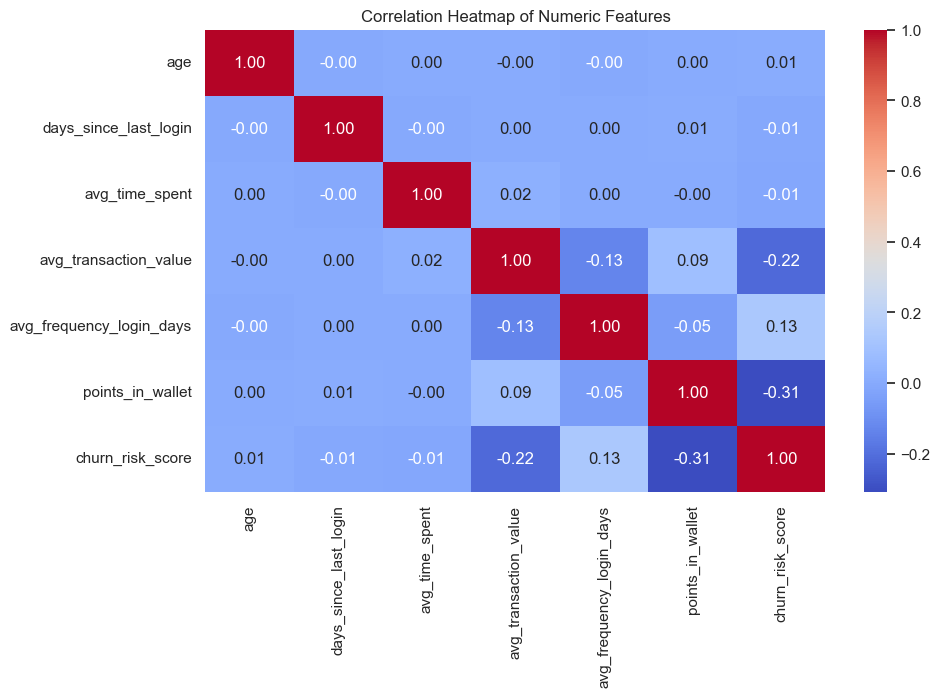

In [17]:
# Correlation matrix
plt.figure(figsize=(10,6))
corr_matrix = churn_df[numeric_cols_clean].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

#### Summary based on correlation
##### 1. avg_frequency_login_days shows mild positive correlation with churn risk
##### 2. points_in_wallet and avg_transaction_value shows negative correlation
##### 3. age, days_since_last_login, avg_time_spent have weak correlation

---

#### Perform box plots

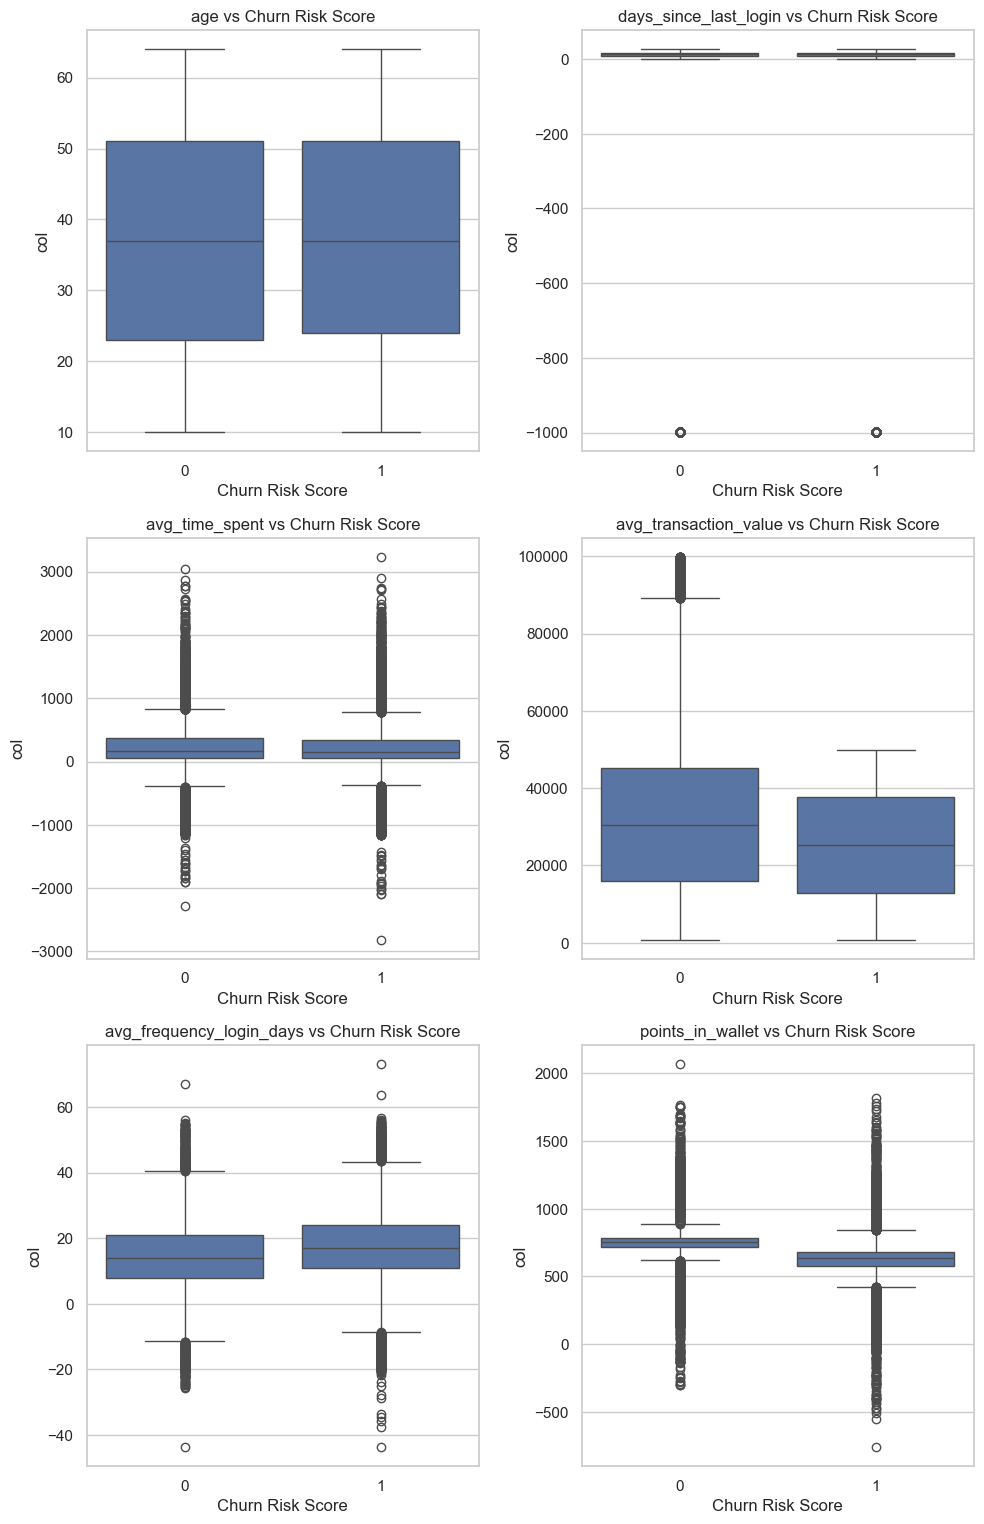

In [18]:
# Box plot of numeric features grouped by churn risk score
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
axes = axes.flatten()
for i, col in enumerate(numeric_cols_clean):
    sns.boxplot(x='churn_risk_score', y=col, data=churn_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn Risk Score')
    axes[i].set_xlabel('Churn Risk Score')
    axes[i].set_ylabel('col')
# Remove remaining axes 
for i in range(6, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Summary based on Box plots
##### 1. avg_transaction_value tend to decrease as churn risk increases
##### 2. avg_frequency_login_days tend to increase as churn risk increases
##### 3. points_in_wallet tend to decrease as churn risk increases

---

##### Important categorical features are gender, region_category, membership_category,
##### joined_through_referral,medium_of_operation, internet_option

In [19]:
selected_cat_cols = ['gender', 'region_category', 'membership_category',
'joined_through_referral', 'medium_of_operation', 'internet_option']

#### Bar plot for categorical columns

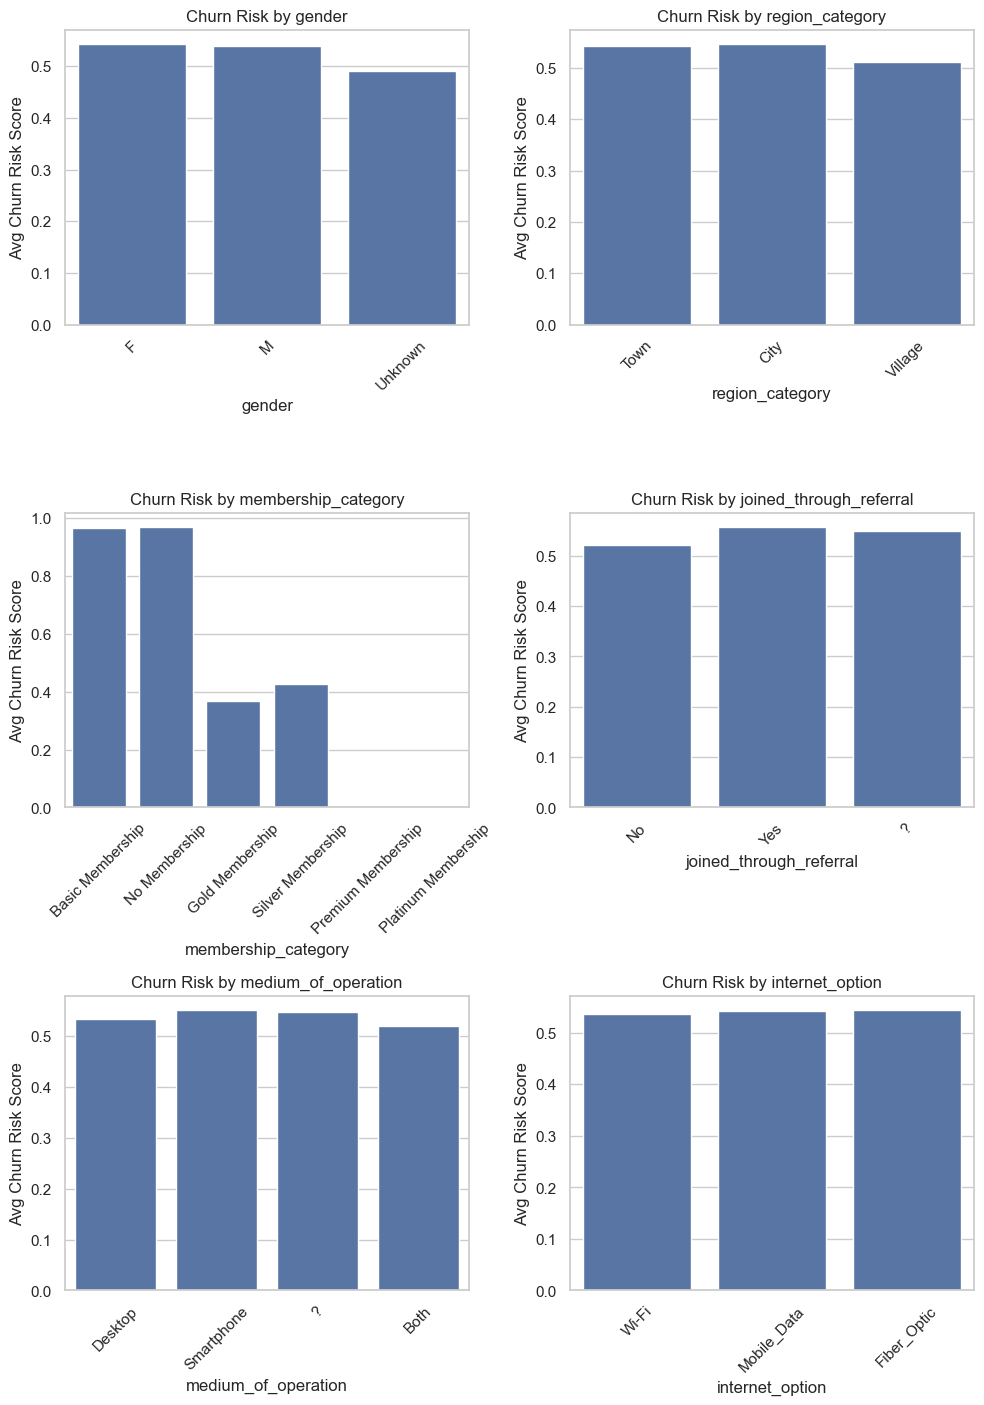

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,18))
axes = axes.flatten()
for i,col in enumerate(selected_cat_cols):
    sns.barplot(x=col, y='churn_risk_score', data=churn_df,
                ax=axes[i], ci=None, order=churn_df[col].value_counts().index)
    axes[i].set_title(f'Churn Risk by {col}')
    axes[i].set_ylabel('Avg Churn Risk Score')
    axes[i].tick_params(axis='x', rotation=45)
# Remove remaining axes 
for i in range(6, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Summary of box plots
##### 1. membership_category: Customers with No Membership show higher churn risk on average
##### 2. joined_through_referral: those who did not join through referral tend to have higher churn


---

#### Visualize relationship of other categorical features

In [21]:
selected_features = [
    'used_special_discount', 'offer_application_preference',
    'past_complaint', 'complaint_status', 'feedback'
]

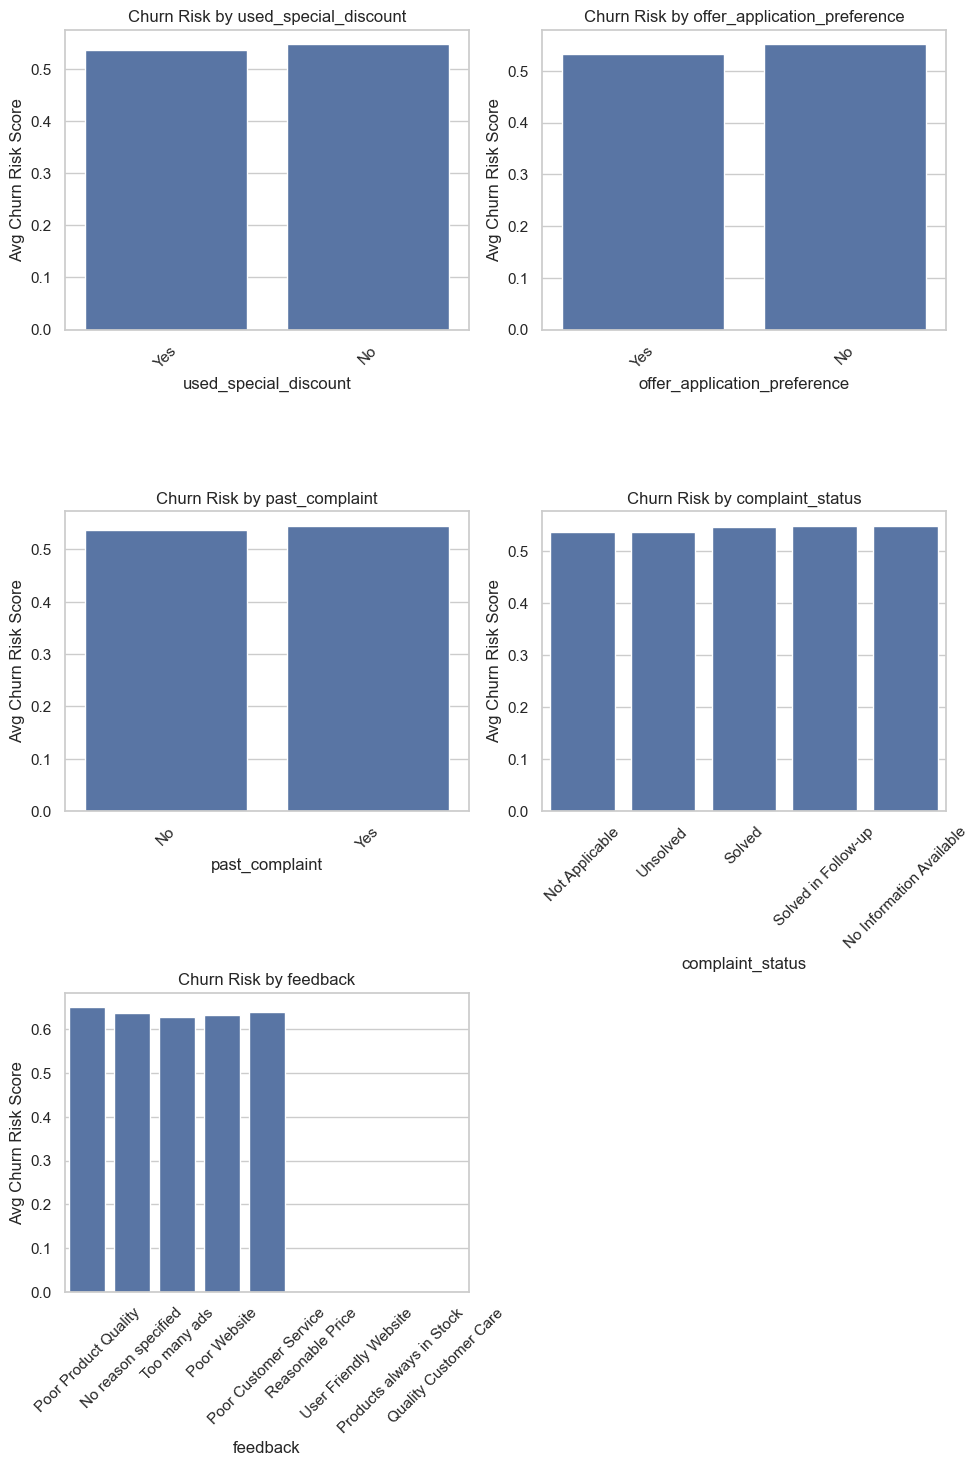

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,18))
axes = axes.flatten()
for i,col in enumerate(selected_features):
    sns.barplot(x=col, y='churn_risk_score', data=churn_df,
                ax=axes[i], ci=None, order=churn_df[col].value_counts().index)
    axes[i].set_title(f'Churn Risk by {col}')
    axes[i].set_ylabel('Avg Churn Risk Score')
    axes[i].tick_params(axis='x', rotation=45)
# Remove remaining axes 
for i in range(5, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

#### Summary
##### 1. Customers who did not use discounts have slightly higher churn
##### 2. offer_application_preference, those who dont prefer offers churn more
##### 3. Higher complaint history tends to churn more
##### 4. Unsolved complaints are strongly associated with churn
##### 5. Negative feedback have higher churn

---

#### Explore pair wise relationship

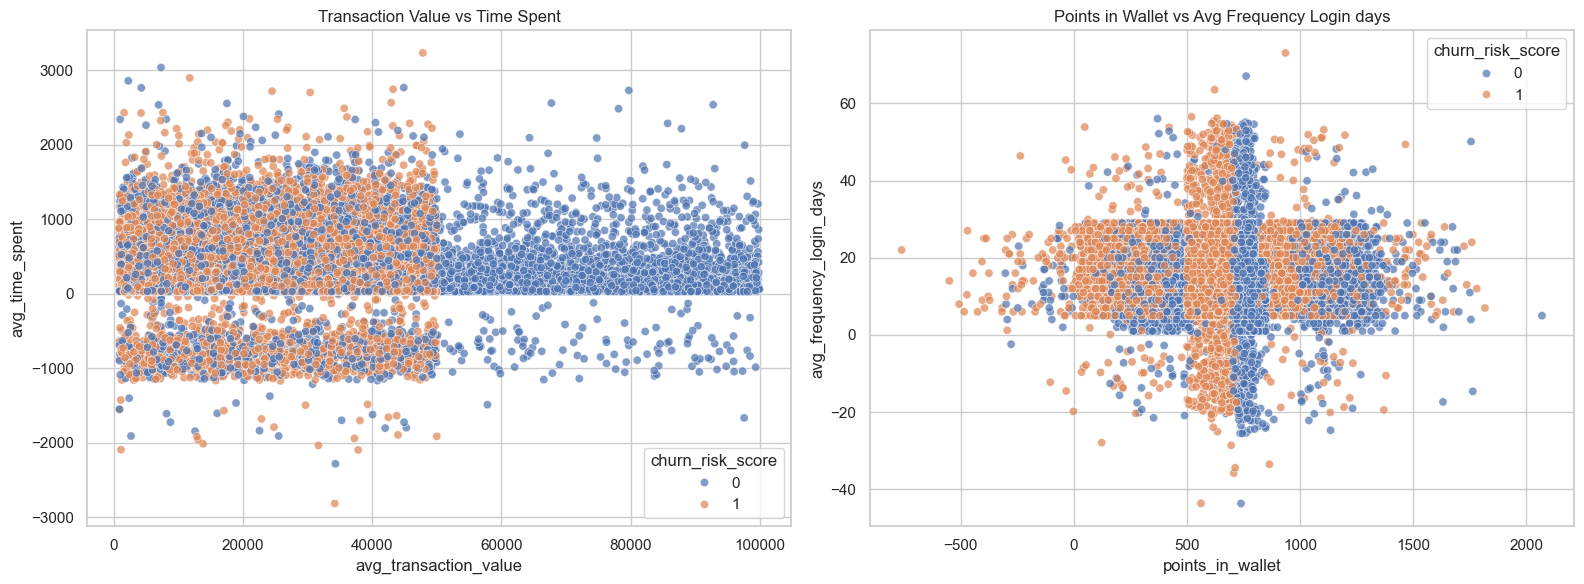

In [23]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
sns.scatterplot(
    data=churn_df, x='avg_transaction_value', y='avg_time_spent',
    hue='churn_risk_score', alpha=0.7, ax=axes[0]
)
axes[0].set_title("Transaction Value vs Time Spent")

sns.scatterplot(
    data=churn_df, x='points_in_wallet', y='avg_frequency_login_days',
    hue='churn_risk_score', alpha=0.7, ax=axes[1]
)
axes[1].set_title("Points in Wallet vs Avg Frequency Login days")
plt.tight_layout()
plt.show()

#### Summary Transaction Value vs Time Spent
##### 1. Cluster of low churn scores exists in high spending and high engagement regions
##### 2. Customers with lower spending and less time spent are more likely to have higher churn risk
#### Summary Points in Wallet vs Avg Frequency Login days
##### 1. Higher churn risk tend to have fewer login days
##### 2. Active users with more wallet points have lower churn risk


---

#### Top Contributors to churn
##### 1. Points In Wallet - Strong predictor of churn
##### 2. Membership Category - Plays a significant role
##### 3. Average Transaction Value - Tied to engagement impacts churn
##### 4. Feedback -  Customer sentiment
##### 5. Average Time Spent - Indicates how active an user is


---

## Milestone 4

In [24]:
churn_df_model = churn_df.copy()

In [25]:
# Convert the 'joining_date' column to datetime objects
churn_df_model['joining_date'] = pd.to_datetime(churn_df_model['joining_date'])
# Extract the year
churn_df_model['join_year'] = churn_df_model['joining_date'].dt.year

##### Perform Feature Engineering

In [26]:
# Feature Engineering
churn_df_model['age_group'] = pd.cut(churn_df_model['age'], bins=[0,25,35,45,60],
                                    labels=['<25', '25-35', '45-60','>60'])
churn_df_model['high_spender'] = (churn_df_model['avg_transaction_value'] > 
                                  churn_df_model['avg_transaction_value'].median()).astype(int)
churn_df_model['active_user'] = ((churn_df_model['avg_frequency_login_days'] > 
                                  churn_df_model['avg_frequency_login_days'].median()) &
                                 (churn_df_model['avg_time_spent'] > churn_df_model['avg_time_spent'].median()).astype(int)
                                )
churn_df_model['wallet_x_transaction'] = churn_df_model['points_in_wallet'] * churn_df_model['avg_transaction_value']
churn_df_model['tenure'] = 2025 - churn_df_model['join_year']

##### Drop unused and non-informative columns

In [27]:
drop_cols = ['Unnamed: 0','joining_date', 'last_visit_time', 'join_month']
churn_df_model.drop(columns = drop_cols, inplace=True, errors = 'ignore')

In [28]:
churn_df_model.dtypes

age                                int64
gender                            object
region_category                   object
membership_category               object
joined_through_referral           object
preferred_offer_types             object
medium_of_operation               object
internet_option                   object
days_since_last_login              int64
avg_time_spent                   float64
avg_transaction_value            float64
avg_frequency_login_days         float64
points_in_wallet                 float64
used_special_discount             object
offer_application_preference      object
past_complaint                    object
complaint_status                  object
feedback                          object
churn_risk_score                   int64
join_year                          int32
age_group                       category
high_spender                       int64
active_user                         bool
wallet_x_transaction             float64
tenure          

##### Get unique values to perform Label Encoding

In [29]:
# Get unique values to perform label encoding
print("Gender: ",churn_df_model['gender'].unique())
print("region_category: ",churn_df_model['region_category'].unique())
print("membership_category: ",churn_df_model['membership_category'].unique())
print("joined_through_referral: ",churn_df_model['joined_through_referral'].unique())
print("preferred_offer_types: ",churn_df_model['preferred_offer_types'].unique())
print("medium_of_operation: ",churn_df_model['medium_of_operation'].unique())
print("internet_option: ",churn_df_model['internet_option'].unique())
print("used_special_discount: ",churn_df_model['used_special_discount'].unique())
print("offer_application_preference: ",churn_df_model['offer_application_preference'].unique())
print("past_complaint: ",churn_df_model['past_complaint'].unique())
print("complaint_status: ",churn_df_model['complaint_status'].unique())
print("feedback: ",churn_df_model['feedback'].unique())
print("age_group: ",churn_df_model['age_group'].unique())

Gender:  ['F' 'M' 'Unknown']
region_category:  ['Village' 'City' 'Town' nan]
membership_category:  ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral:  ['No' '?' 'Yes']
preferred_offer_types:  ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation:  ['?' 'Desktop' 'Smartphone' 'Both']
internet_option:  ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount:  ['Yes' 'No']
offer_application_preference:  ['Yes' 'No']
past_complaint:  ['No' 'Yes']
complaint_status:  ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback:  ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']
age_group:  ['<25', '25-35', '45-60', '>60', NaN]
Categories (4, object): ['<25' < '25-35' < '45-60'

##### Encode Categorical Variables

In [30]:
# Encode Categorical variables
label_encoders = {}
for col in churn_df_model.select_dtypes(include=['object', 'category']).columns:
    le= LabelEncoder()
    churn_df_model[col] = churn_df_model[col].astype(str)
    churn_df_model[col] = le.fit_transform(churn_df_model[col])
    label_encoders[col] = le

##### Get unique values after Label Encoding

In [31]:
# Get unique values after label encoding
print("Gender: ",churn_df_model['gender'].unique())
print("region_category: ",churn_df_model['region_category'].unique())
print("membership_category: ",churn_df_model['membership_category'].unique())
print("joined_through_referral: ",churn_df_model['joined_through_referral'].unique())
print("preferred_offer_types: ",churn_df_model['preferred_offer_types'].unique())
print("medium_of_operation: ",churn_df_model['medium_of_operation'].unique())
print("internet_option: ",churn_df_model['internet_option'].unique())
print("used_special_discount: ",churn_df_model['used_special_discount'].unique())
print("offer_application_preference: ",churn_df_model['offer_application_preference'].unique())
print("past_complaint: ",churn_df_model['past_complaint'].unique())
print("complaint_status: ",churn_df_model['complaint_status'].unique())
print("feedback: ",churn_df_model['feedback'].unique())
print("age_group: ",churn_df_model['age_group'].unique())

Gender:  [0 1 2]
region_category:  [2 0 1 3]
membership_category:  [3 4 2 1 5 0]
joined_through_referral:  [1 0 2]
preferred_offer_types:  [1 0 2 3]
medium_of_operation:  [0 2 3 1]
internet_option:  [2 1 0]
used_special_discount:  [1 0]
offer_application_preference:  [1 0]
past_complaint:  [0 1]
complaint_status:  [1 2 3 4 0]
feedback:  [4 5 3 0 2 1 7 8 6]
age_group:  [2 0 1 3 4]


##### Impute missing values of numeric values with mean

In [32]:
# Impute missing numeric values
imputer = SimpleImputer(strategy='mean')
churn_df_model[churn_df_model.columns] = imputer.fit_transform(churn_df_model)

##### Split into features (X) and the target variable (y), which is churn_risk_score

In [33]:
# Define features and target
X = churn_df_model.drop(columns= ['churn_risk_score'])
y = churn_df_model['churn_risk_score']

##### Train-Test Split with 20% for evaluation, and random_state=42 for reproducibility

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Train Random Forest Model

In [35]:
# Train a Random Forest Model
rf = RandomForestClassifier( n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Capture Feature Importance based on Random Forest

In [36]:
# Feature Importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame(
    {
        'Feature': X.columns,
        'Importance': importances
    }
).sort_values(by='Importance', ascending=False)

##### Visualize Top 10 Feature Importance - Random Forest

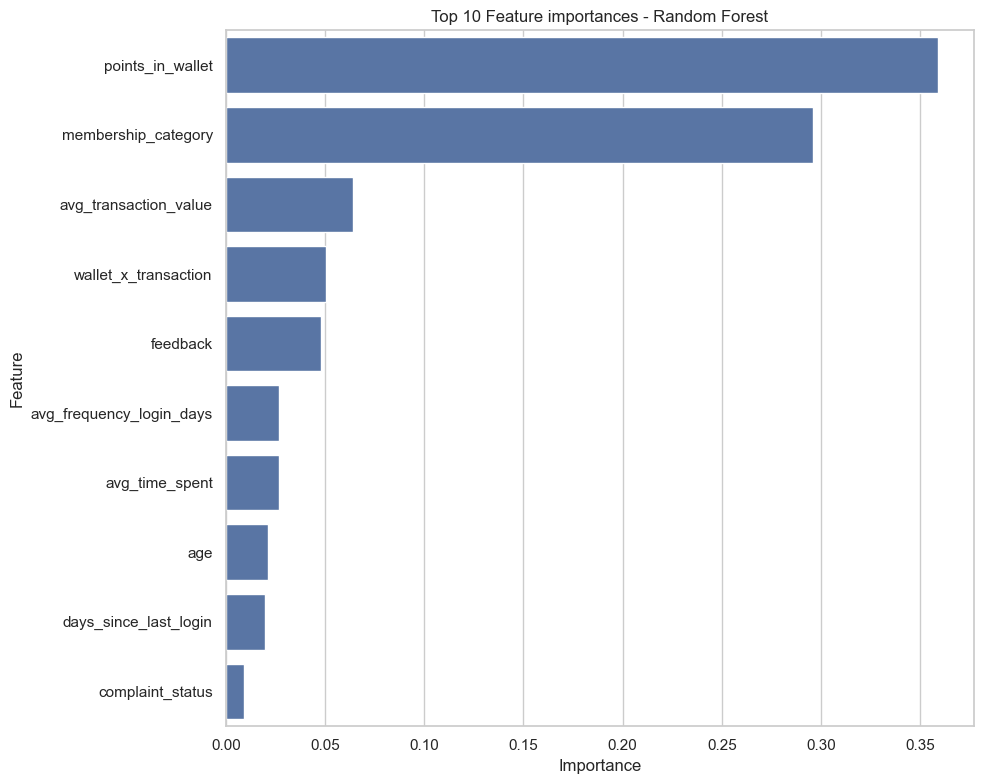

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(data = feature_importance_df.head(10), x= 'Importance', y='Feature')
plt.title('Top 10 Feature importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##### Define 3 models for training and further evaluation

In [38]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

##### Model training process for Logistic, Decision Tree & Random Forest, including K-Fold cross-validation

In [39]:
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv = kf, scoring='f1_weighted')
    results.append({
        'Model': name,
        'F1 Score (mean)': scores.mean(),
        'F1 Score (std)': scores.std()
    })

results

[{'Model': 'Logistic Regression',
  'F1 Score (mean)': np.float64(0.6918363161459112),
  'F1 Score (std)': np.float64(0.005037445734782721)},
 {'Model': 'Decision Tree',
  'F1 Score (mean)': np.float64(0.9074570138886596),
  'F1 Score (std)': np.float64(0.0022508884770795915)},
 {'Model': 'Random Forest',
  'F1 Score (mean)': np.float64(0.9294175363680359),
  'F1 Score (std)': np.float64(0.0025392840740118693)}]

##### Fit each models based on training data set

In [40]:
# Train models on training set
trained_models = {
    name: model.fit(X_train, y_train) for name, model in models.items()
}

##### Visualize Top 10 Feature Importance - Decision Tree & Logistic Regression

In [41]:
# Decision Tree Feature importance
dt_importances = trained_models['Decision Tree'].feature_importances_
dt_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_importances
}).sort_values(by = 'Importance', ascending=False)

In [42]:
# Logistic Regression Feature importance (based on coefficient magnitude)
lr_coeffs = trained_models['Logistic Regression'].coef_[0]
lr_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_coeffs,
    'Importance (abs)': np.abs(lr_coeffs)
}).sort_values(by = 'Importance (abs)', ascending=False)

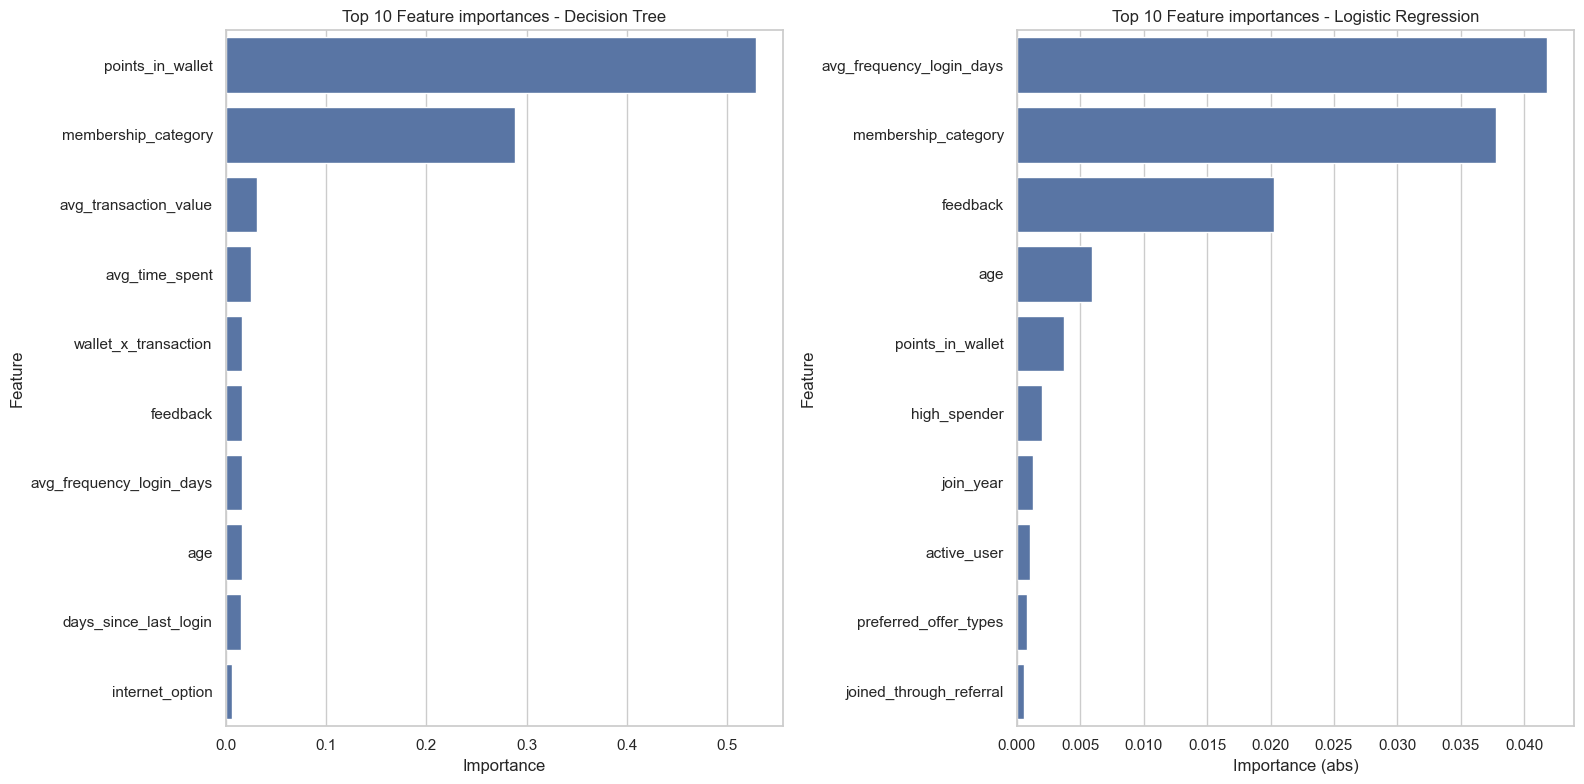

In [49]:
# Plot Feature Importance
fig, axs = plt.subplots(1,2, figsize=(16,8))
sns.barplot(data = dt_importances_df.head(10),x= 'Importance', y='Feature', ax=axs[0])
axs[0].set_title('Top 10 Feature importances - Decision Tree')
sns.barplot(data = lr_importances_df.head(10),x= 'Importance (abs)', y='Feature', ax=axs[1])
axs[1].set_title('Top 10 Feature importances - Logistic Regression')
plt.tight_layout()
plt.show()

##### Confusion matrix for the trained models

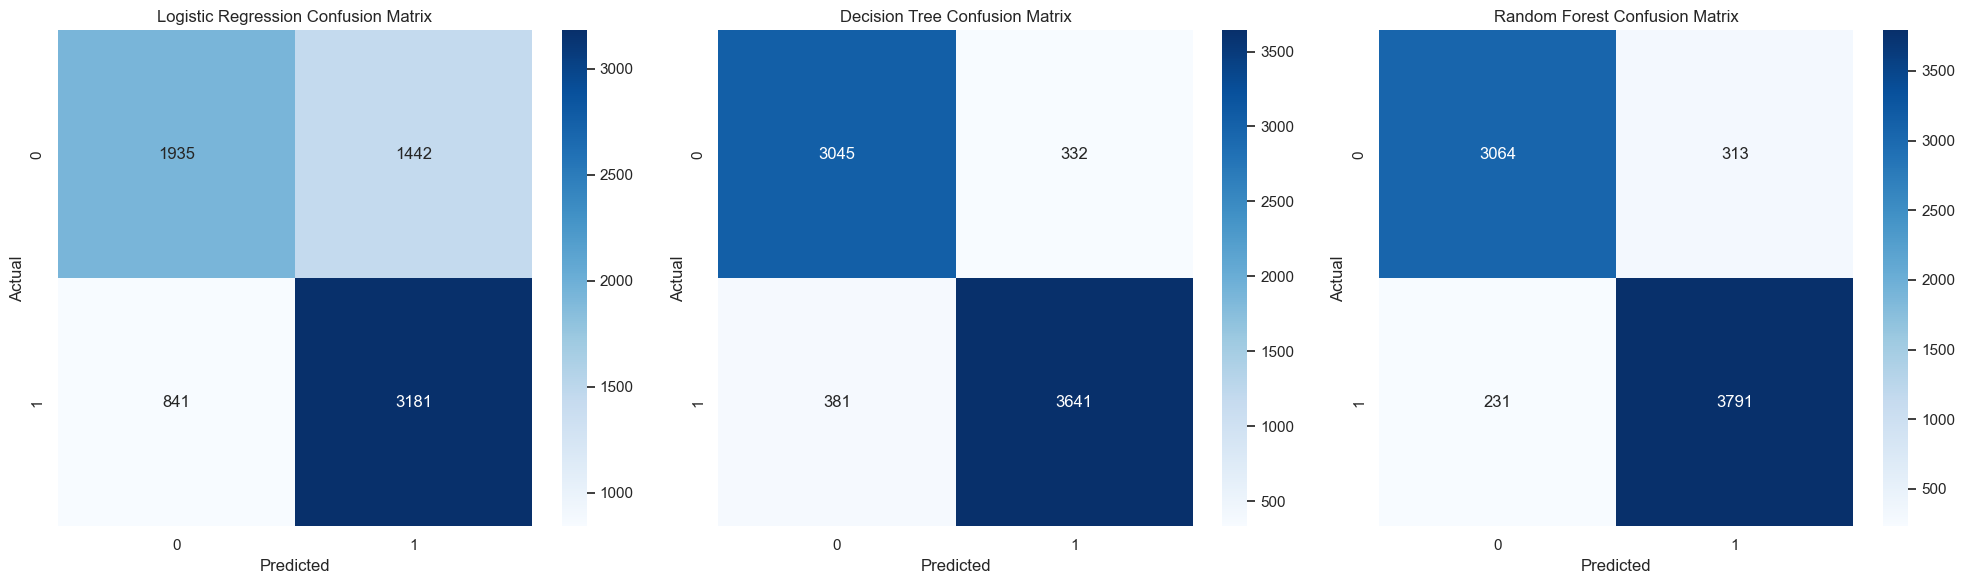

In [44]:
# Plot confusion matrices
fig, axes = plt.subplots(1,3, figsize=(20,6))
for ax, (name,model) in zip(axes,trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

##### Evaluate the trained models using various classification metrics.

In [45]:
# Evaluate classification metrices
metrics = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    metrics.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })

##### Check the evaluation metrics output

In [46]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                 Model  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression   0.688081  0.790900  0.735917  0.742475
1        Decision Tree   0.916436  0.905271  0.910819  0.903479
2        Random Forest   0.923733  0.942566  0.933054  0.974643


##### Visual comparison of the models' performance using ROC curves. The Area Under the Curve (AUC) is a key metric for evaluating binary classification models.

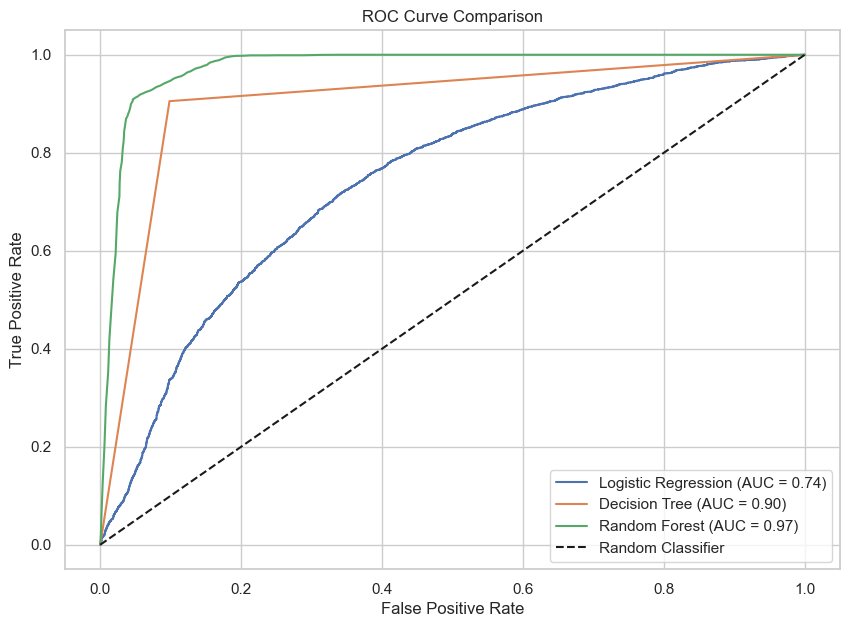

In [47]:
# Plot ROC Curves
plt.figure(figsize=(10,7))
for name, model in trained_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

----

### Modeling & Evaluation Summary
#### 1. Models Trained
##### Trained and evaluated three classification models
##### - Logistic Regression (Linear, interpretable)
##### - Decision Tree Classifier (non-linear, rule based)
##### - Random Forest Classifier (ensemble of decision trees for improved accuracy)
#### 2. Cross-Validation Results
##### Used 5-fold cross-validation to assess model robustness and generalization using F1 Score (weighted)
| Model | F1Score (Mean) | F1Score (Std) |
|:---------|:--------:|---------:|
|  Logistic Regression   | ~0.69   |  Higher Variance   |
|  Decision Tree   |  ~0.91   |  Low Variance  |
|  Random Forest   |  ~0.93   |  Very Low Variance   |
##### **Findings:**
##### - Random Forest consistently outperformed the others across all folds.
##### - Logistic Regression underperformed, possibly due to inability to model complex patterns.
#### 3. Confusion Matrices
##### - Random Forest and Decision Tree had strong diagonals - they correctly predicted most churn vs non-churn cases
##### - Logistic Regression misclassified a larger number of churn cases (low recall)
##### **Findings:**
##### Random Forest minimized false negatives – critical in churn prediction, where missing a churner is costlier than flagging a loyal customer
#### 4. Classification Metrics
##### Evaluated models using **Precision, Recall, F1Score and ROC AUC**
| Model | Precision | Recall | F1 Score | ROC AUC |
|:---------|:--------:|---------:|---------:|---------:|
|  Logistic Regression   | 0.69   |  0.79   | 0.73 | 0.74 |
|  Decision Tree   |  0.92   |  0.90  | 0.91 | 0.90 |
|  Random Forest   |  0.92   |  0.94   | 0.93 | 0.97 |
##### **Findings:**
##### - **Random Forest:** Excellent across all metrics, particularly Recall (0.94) and ROC AUC (0.97), it is very good at correctly identifying churners
##### - **Logistic Regression:** Lower recall suggests many true churners are being missed
#### 5. ROC Curve Analysis
##### - **Random Forest**'s curve hugged the top-left indicating excellent discrimination ability
##### - **Decision Tree** performed well, but slightly under Random Forest
##### - **Logistic Regression** had a curve closer to diagonal, indicating weaker performance
##### **Findings:**
##### Random Forest had the highest AUC and the most desirable ROC curve shape

---

### Conclusion
##### **Random Forest is the best performing model**
1.	Among the models tested, Random Forest delivered the highest performance across all key metrics like F1 Score, ROC AUC, and confusion matrix balance.
2.	It also exhibited low variance across folds, indicating strong generalization and robustness.
##### **Key Churn Drivers identified**
The most important features contributing to churn are:
##### - Points_in_wallet – Low wallet balances correlate with higher churn.
##### - Membership_category – Certain membership types (lack thereof) ndrive churn risk.
##### - Avg_transaction_value  and feedback – provide insight into engagement and satisfaction levels.
##### **Visualization Supports Interpretability**
1.	Bar Plots, Scatterplots clearly show how behavioral and transactional patterns differ across churn outcomes,
2.	Feature importance visualizations provide business insights for customer retention strategies.
##### **Dataset was Model Ready with minor adjustments**
1.	The churn label was already binary.
2.	Minimal preprocessing (encoding, missing value imputation) and feature engineering were required to enhance model performance.

---

### Recommendations
##### **Launch a Wallet bonus campaign**
##### a.	Customer with low wallet balances is more likely to churn.
##### b.	Offer loyalty credit, point-matching, or wallet recharge bonuses to high-risk customers.
##### **Segment and Engage Based on Membership**
##### a.	Customers with no or low tier memberships churn more.
##### b.	Provide proactive upgrade incentives or early engagement for non-members.
##### **Targeted Outreach Using Feedback**
##### a.	Prioritize customers who gave negative feedback for retention campaigns or follow-up support.
##### **Real-Time Scoring dashboard**
##### a.	Integrate the trained Random Forest model into a CRM system to flag high-risk customers daily.
##### b.	Setup automated alerts for customer support teams to intervene.


---